In [10]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm
from IPython.display import HTML

In [11]:
Nt = 1000
Nx = 50

x = np.linspace(0,1,Nx)
t = np.linspace(0,10,Nt)

a = 0.2
b = 0.3
ep = 0.03
D = 0.01
delta = x[1] - x[0]
deltat = t[1] - t[0]
print(delta,deltat)

0.02040816326530612 0.01001001001001001


In [12]:
def InitU():

    U = np.zeros((Nt,Nx))

    U[:,0] = 0.1
    U[:,-1] = 0.2

    return U

In [13]:
def InitW():

    W = np.zeros((Nt,Nx))



    return W

In [14]:
U = InitU()
W = InitW()

In [15]:
def GetSolution():

    for l in tqdm(range(1,len(t))):
        for i in range(1,len(x)-1):
            U[l,i]= U[l-1,i] + deltat*(D*(U[l-1,i+1] - 2*U[l-1,i] + U[l-1,i-1])/(delta**2)-U[l-1,i]*(U[l-1,i]-a)*(1-U[l-1,i]) + W[l-1,i])
            W[l,i] = deltat*(U[l-1,i]-b*W[l-1,i]) + W[l-1,i]

In [16]:
GetSolution()

 46%|████▋     | 464/999 [00:00<00:00, 4632.38it/s]<ipython-input-15-67d7e9329853>:5: RuntimeWarning: overflow encountered in scalar multiply
  U[l,i]= U[l-1,i] + deltat*(D*(U[l-1,i+1] - 2*U[l-1,i] + U[l-1,i-1])/(delta**2)-U[l-1,i]*(U[l-1,i]-a)*(1-U[l-1,i]) + W[l-1,i])
<ipython-input-15-67d7e9329853>:5: RuntimeWarning: invalid value encountered in scalar subtract
  U[l,i]= U[l-1,i] + deltat*(D*(U[l-1,i+1] - 2*U[l-1,i] + U[l-1,i-1])/(delta**2)-U[l-1,i]*(U[l-1,i]-a)*(1-U[l-1,i]) + W[l-1,i])
<ipython-input-15-67d7e9329853>:5: RuntimeWarning: invalid value encountered in scalar add
  U[l,i]= U[l-1,i] + deltat*(D*(U[l-1,i+1] - 2*U[l-1,i] + U[l-1,i-1])/(delta**2)-U[l-1,i]*(U[l-1,i]-a)*(1-U[l-1,i]) + W[l-1,i])
100%|██████████| 999/999 [00:00<00:00, 4476.19it/s]


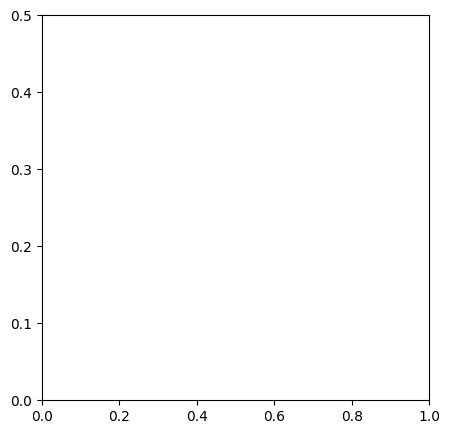

In [20]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():

    ax.clear()
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(0,0.5)

def Update(i):

    init()
    ax.plot(x,U[i,:],'--', label=r'T(x,%.2f)' %(t[i]))
    ax.legend()

Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)
HTML(Animation.to_html5_video())

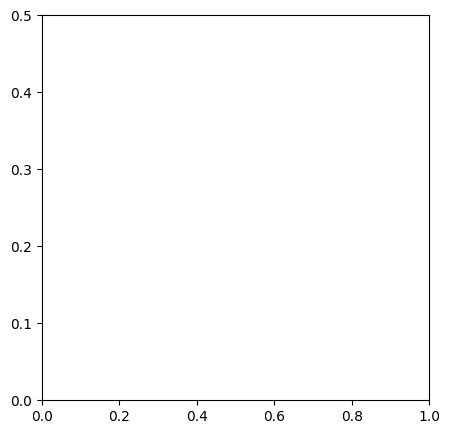

In [21]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():

    ax.clear()
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(0,0.5)

def Update(i):

    init()
    ax.plot(x,W[i,:],'--', label=r'T(x,%.2f)' %(t[i]))
    ax.legend()

Animation1 = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)
HTML(Animation1.to_html5_video())

NameError: name 'y' is not defined

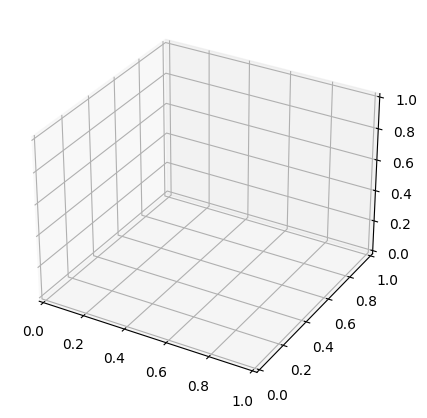